In [45]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as e

from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = w.get_cws_data()

In [3]:
df

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
0,3946,75.00,75.00,0,131,"Uncllctbl key, remote fees",136,"Uncllctbl key, remote fees",Current,1311,15,52500,False,666000,Accept,33,745,Insufficient period of Residence History,1
1,3962,13.66,13.66,0,112,Water 8/1/2021-9/1/2021,136,Utility-water charges,Current,1661,12,65000,False,889992,Accept with Conditions (Extra Deposit),27,758,No Credit Experience,0
2,4050,46.17,46.17,0,155,Damage charges - Clean,136,Damage charges,Current,1412,12,48000,False,576000,Accept with Conditions (Extra Deposit),33,666,Insufficient period of Residence History,1
3,4948,9.76,9.76,0,111,Sewer Charge,140,Utility-sewer charges,Current,1377,18,72000,False,0,A-Criminal History Meets Requirements,39,0,Meets All Property Requirements,0
4,5001,6.85,6.85,0,113,Sewer Base Charge,140,Utility-water flat base charges,Current,2199,13,0,True,54996,Accept with Conditions (Guarantor),23,752,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,74033,1439.37,1439.37,0,74,Rent for 29 days,85,Rent,Current,1489,12,0,True,0,Accept with Conditions (Guarantor),24,708,Insufficient Income to Support Rent,0
5000,74056,150.00,150.00,0,162,Deposit Waiver Fee (Amount subject to screenin...,152,Deposit waiver fee,Current,1859,13,10000,False,121776,Accept,32,786,Meets All Property Requirements,0
5001,74230,5.00,5.00,0,186,Convenience Fee,61,OSP resident convenience fee,Current,1439,12,4350,False,57432,Accept with Conditions (Extra Deposit),36,691,Limited period of Residence History,0
5002,74231,5.00,5.00,0,186,Convenience Fee (ray farmer),83,OSP resident convenience fee,Current,1739,12,7916,False,94992,Accept,47,770,Meets All Property Requirements,0


In [4]:
charge_codes = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]

In [5]:
#split data

train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [6]:
train.shape, validate.shape, test.shape

((2802, 19), (1201, 19), (1001, 19))

### Are certain age groups more likely to cause damage?

In [7]:
len(train[train.bad_resident == 1])

107

In [8]:
train

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
2505,63279,6.00,6.00,0,190,Pest control (01/2023),76,Pest control,Current,1679,4,14083,False,241992,Accept,45,648,Meets All Property Requirements,0
1262,45474,1479.00,1479.00,0,74,Rent (02/2023),127,Rent,Current,1479,18,4095,True,49140,Accept with Conditions (Guarantor),34,561,Severe level of Charge-offs,0
2542,63383,4.00,4.00,0,190,Pest control (02/2023),93,Pest control,Current,1269,12,3308,True,0,Accept with Conditions (Guarantor),40,632,Insufficient Income to Support Rent,0
730,31765,0.90,0.90,0,128,Valet Waste for 1 days,136,Trash service fee,Current,1689,12,1906,True,0,Accept with Conditions (Guarantor),27,771,Insufficient Income to Support Rent,0
3048,64923,5.00,5.00,0,191,Amenity fee (02/2023),121,Amenity fee,Current,1409,18,6250,False,96732,Accept with Conditions (Extra Deposit),33,0,No Credit Experience,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,68290,16.67,16.67,0,128,Valet Trash for 20 days,55,Trash service fee,Current,1759,13,4750,False,224592,Accept with Conditions (Max Deposit),38,613,Severe level of Judgments/Suits OR Repossessio...,0
4452,70784,3.00,0.00,-1,190,Pest control (03/2023),68,Pest control,Current,1319,13,3200,True,41268,Accept with Conditions (Guarantor),28,548,Insufficient Income to Support Rent,0
1063,33589,239.83,239.83,0,74,Rent for 5 days,90,Rent,Current,1439,12,5222,False,113292,Accept,28,747,No Credit Experience,0
3145,65242,0.38,0.38,0,112,Utility-water charges for 12 Days,55,Utility-water charges,Current,1589,12,5500,False,152760,Accept,53,722,Limited period of Employment History,0


In [9]:
train.age.describe()

count    2802.000000
mean       32.869022
std        11.238401
min         3.000000
25%        25.000000
50%        30.000000
75%        37.000000
max       122.000000
Name: age, dtype: float64

<AxesSubplot:>

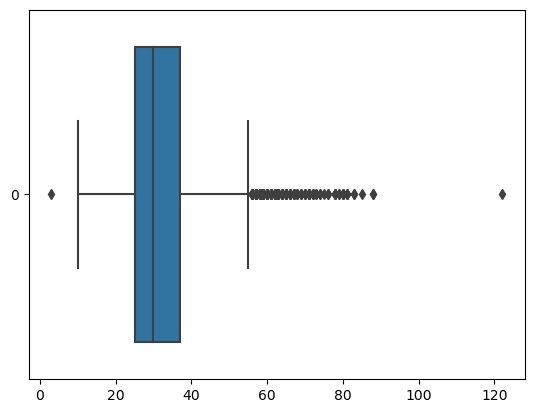

In [10]:
sns.boxplot(data = train.age, orient= 'h')

<AxesSubplot:xlabel='age', ylabel='Count'>

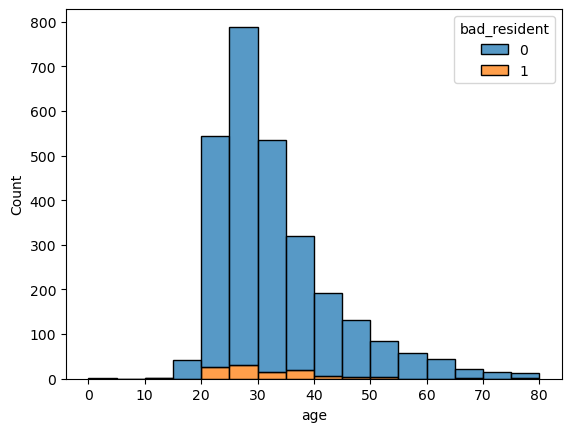

In [24]:
bins = [0, 18, 30, 40, 50, 60, 70, 80]
sns.histplot(data=train, x="age", bins=binss, hue="bad_resident", multiple="stack")

<AxesSubplot:xlabel='age', ylabel='Count'>

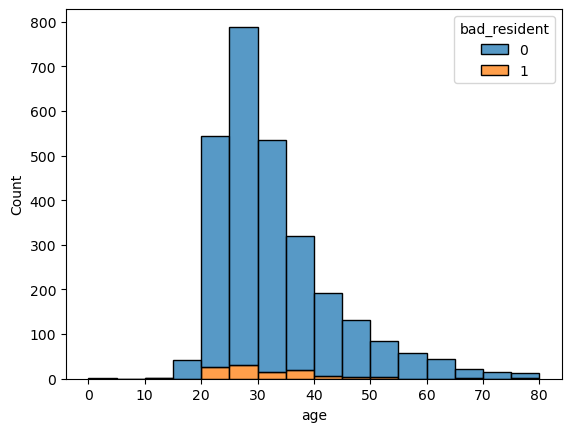

In [23]:
binss = [0, 5, 10, 15, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 65, 70, 75, 80]
sns.histplot(data=train, x="age", bins=binss, hue="bad_resident", multiple="stack")

In [20]:
age_bin = pd.cut(train.age, bins= binss)

$H_0$: Age is not dependent on damage

$H_a$: Age is dependent on damage

In [21]:
chi2,p = e.chi_test(age_bin, train)
    
print(f'chi² = {chi2:.3f}')
print(f'p = {p:.3}')    

chi² = 43.732
p = 0.000121


In [22]:
𝜶 = .05

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


In [17]:
observed = pd.crosstab(train.bad_resident, age_bin)

In [18]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(3.757322077549034, 0.7094777845653253)

### Are shorter term rentors causing more damage?

In [31]:
train['term'].value_counts().sort_index()

1       10
2        5
3       10
4       14
5       16
6       70
7       16
8       19
9       20
10      27
11      59
12    1099
13     557
14     300
15     395
16      52
17      22
18     110
28       1
Name: term, dtype: int64

<AxesSubplot:>

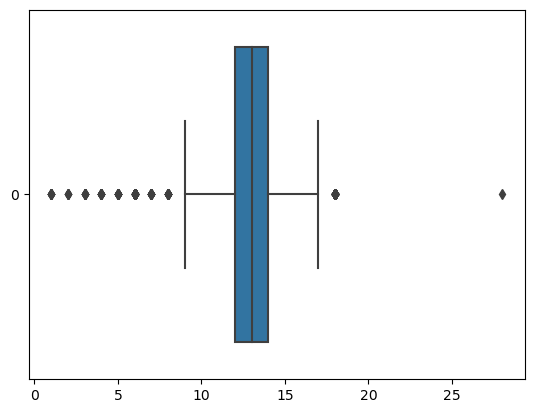

In [33]:
term_len_count = train['term'].value_counts().sort_index()

sns.boxplot(data = train.term, orient= 'h')

In [34]:
train.term.describe()

count    2802.000000
mean       12.754104
std         2.469925
min         1.000000
25%        12.000000
50%        13.000000
75%        14.000000
max        28.000000
Name: term, dtype: float64

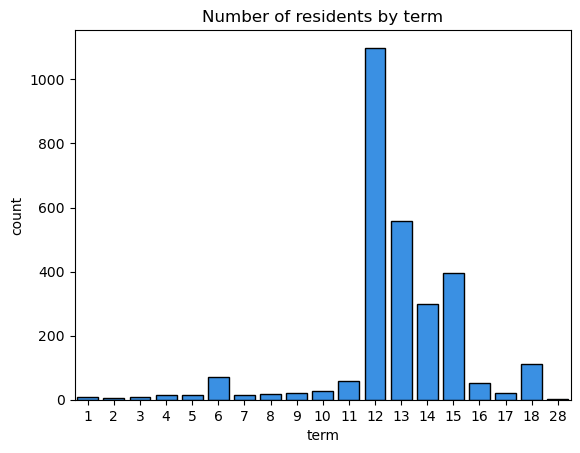

In [51]:
sns.countplot(train.term,color = 'dodgerblue', ec = 'black' )
plt.title("Number of residents by term")
plt.show()

<AxesSubplot:xlabel='term', ylabel='count'>

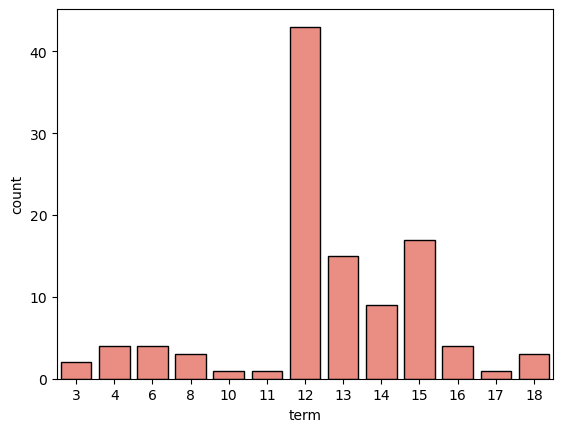

In [58]:
bad_resid = train[(train.bad_resident == 1)]

sns.countplot(x = 'term', data = bad_resid, color = '#fb8072', ec = 'black')

$H_0$: Term lease is not dependent on damage

$H_a$: Term lease is dependent on damage

In [60]:
chi2, p = e.chi_test(train['term'], train)

print(f'chi² = {chi2:.3f}')
print(f'p = {p:.3}')    

chi² = 47.268
p = 0.000193


In [61]:
𝜶 = .05

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


In [76]:
def countplot(data, column, color):
    
    sns.countplot(x = column, data = data, color = color, ec = 'black')
    plt.title(f'NUMBER OF RESIDENTS BY {column.upper()}')
    plt.xlabel(f'{column.capitalize()}')
    plt.ylabel('Count')
    plt.show()

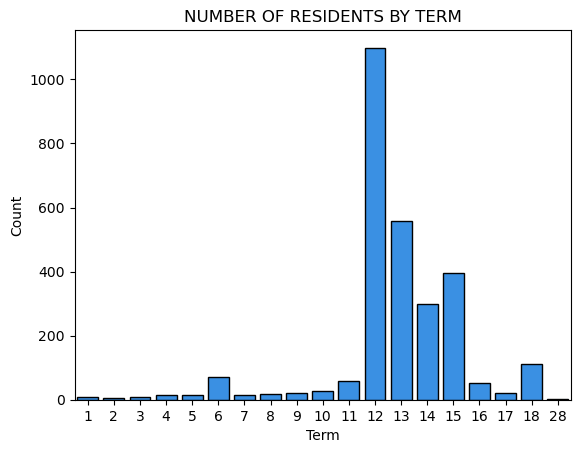

In [81]:
countplot(train, 'term', 'dodgerblue')